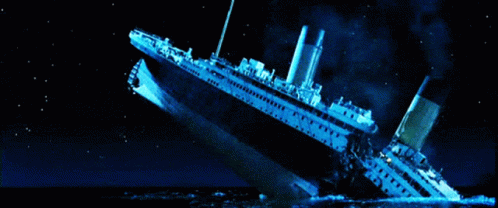

In [1]:
from IPython.display import Image
Image(filename="tenor.gif")

In this study, we explore and analyse the data from titanic dataset. By this tragedy many people died, however, some people could still survive! This dataset, including 15 columns, provides us if a specific passenger died or survived during this shipwreck. Some columns don't deliver informative data. So, we focus on the valuable data.

Sources: The Dataset of Titanic (as a csv. file) is available on the Kaggle.com.
you can find it also in my Github.

# Content

1. Collecting the data
2. Exploratory data analysis
3. Feature engineering
4. Modeling & Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  
from scipy import misc
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy import integrate
from scipy import optimize
import scipy.io as spio
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
#Plots Setting
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=10)   # fontsize of the figure title
plt.rc('lines', linewidth=1, color='r')
plt.rcParams['figure.figsize']=(8,6)
Set1=['Red', 'Green','Yellow','pink', 'Navy','purple','black','Blue']

In [4]:
Titan = sns.load_dataset('titanic')
Titan.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
print('titanic-dataset has {} columns.'.format(len(Titan.columns)))

titanic-dataset has 15 columns.


In [6]:
#If is there any Null value?
Titan.isnull().sum()
#Alternatively: #Titan.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#Let's describe the sex-column:
Titan.sex.describe()   #Titan.sex


count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

In [8]:
#To check if the calculation above is correct
Titan.loc[Titan.sex=='female', 'sex'].count()

314

In [9]:
#figuring out the gender types
Gender = Titan["sex"].unique()
Gender

array(['male', 'female'], dtype=object)

In [10]:
print('\nNo. of male passengers:{} & No. of female passengers: {} of total {} passengers\n'.format((Titan.sex=='male').sum(), (Titan.sex=='female').sum(),len(Titan.sex)))


No. of male passengers:577 & No. of female passengers: 314 of total 891 passengers



In [11]:
# and lets see what are the embarked (the starting city) classes
Embarked = Titan["embarked"].unique()
Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
#so how many missing values refere to nan
Titan.embarked.isna().sum()

2

# Visualization
1. Number of Passengers vs. Gender
2. Age Distribution of survivals and deads

In [13]:
print('\n Average age of males is: {} years old, and female is: {} years old.\n'.format(Titan.age[Titan.sex == 'male'].mean(), Titan.age[Titan.sex == 'female'].mean()))


 Average age of males is: 30.72664459161148 years old, and female is: 27.915708812260537 years old.



In [14]:
#the frequencies of survivals between Men and Women
Titan[Titan.survived==1]['sex'].value_counts()

female    233
male      109
Name: sex, dtype: int64

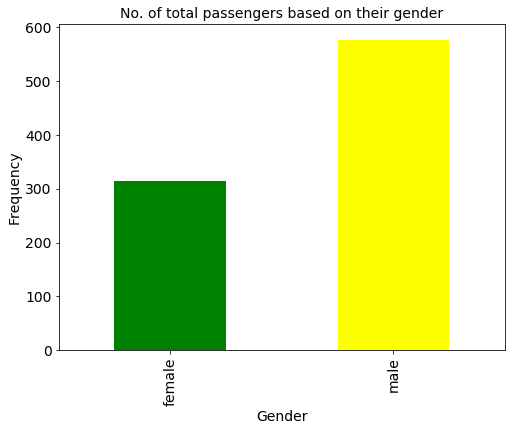

In [15]:
# or showing as a classification (bar) diagram: No. of sample per each (sex)classes
count_classes = pd.value_counts(Titan['sex'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','yellow'])
plt.title("No. of total passengers based on their gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

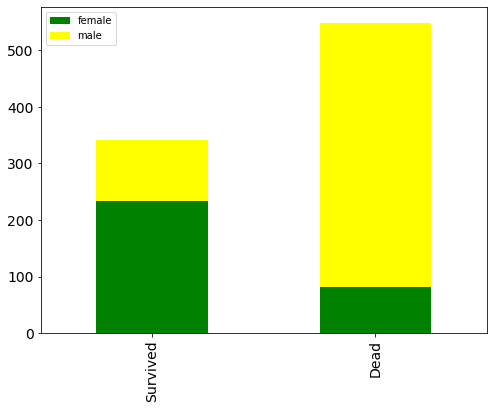

In [16]:
#Survival vs. Dead passengers
survived = Titan[Titan['survived']==1]['sex'].value_counts()
dead = Titan[Titan['survived']==0]['sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True,color=['Green', 'Yellow'])

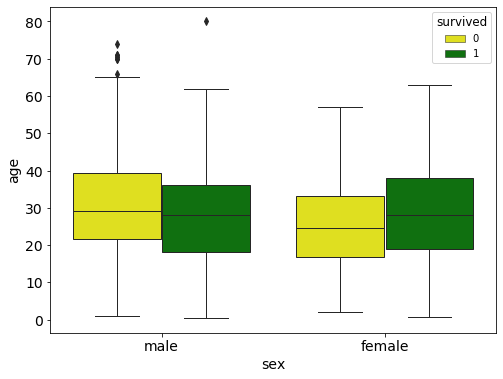

In [17]:
#age-gender distribution (Box-Plot)
sns.boxplot(x="sex", y="age", hue="survived", data=Titan, palette=['Yellow','Green'])

In [18]:
#Titan.loc[(Titan.sex == 'female') & (Titan.survived==1)]
#Titan.age[(Titan.sex == 'female') & (Titan.survived==1)]

C:\Users\behodi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\behodi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


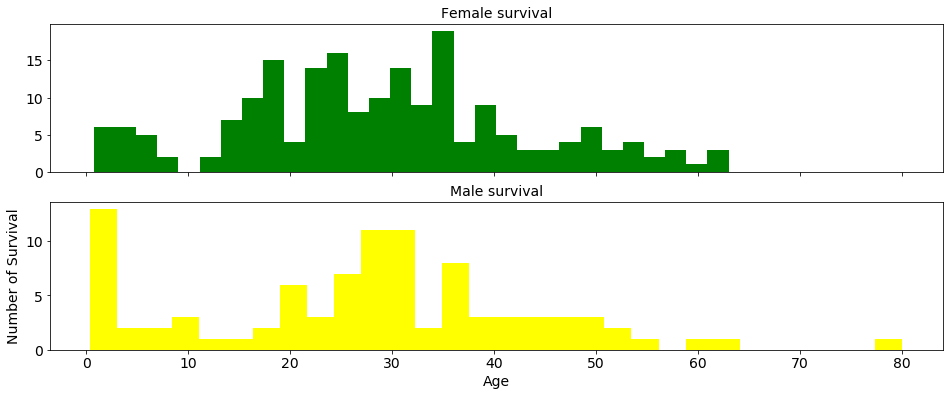

In [19]:
import scipy
#age-gender distribution


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
bins = 30

ax1.hist(Titan.age[(Titan.sex == 'female') & (Titan.survived==1)], bins = bins, color='Green')
ax1.set_title('Female survival')
plt.ylabel('Number of Survival')

ax2.hist(Titan.age[(Titan.sex == 'male') & (Titan.survived==1)], bins = bins, color='Yellow')
ax2.set_title('Male survival')

plt.ylabel('Number of Survival')
plt.xlabel('Age')


plt.show()

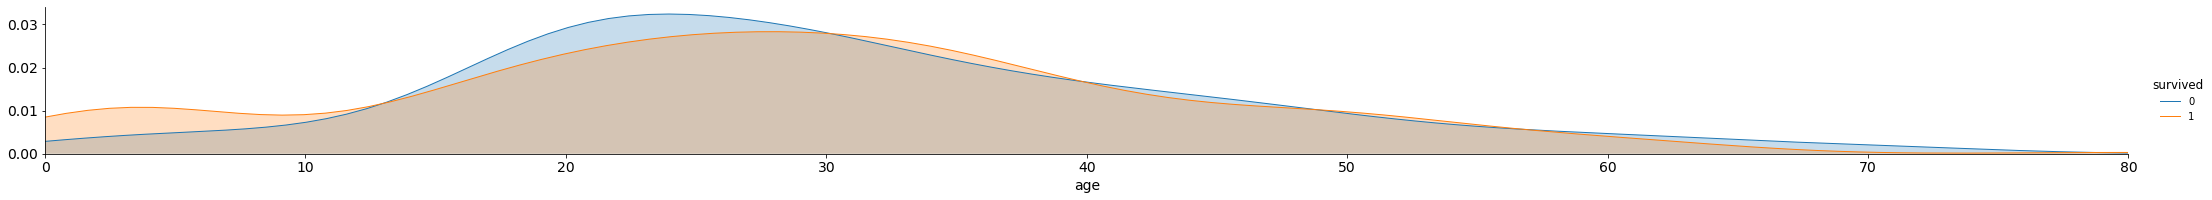

In [20]:
plt.rcParams['figure.figsize'] = [16, 16]
facet=sns.FacetGrid(Titan, hue='survived', aspect=10)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0,Titan.age.max()))
facet.add_legend()
plt.show()

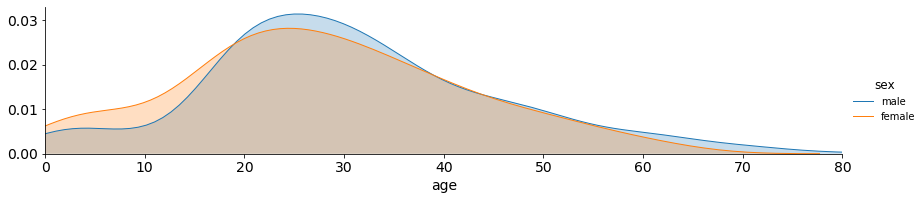

In [21]:
#age occurance between men and women
facet = sns.FacetGrid(Titan, hue="sex",aspect=4)
facet.map(sns.kdeplot,'age', shade= True)
facet.set(xlim=(0, Titan['age'].max()))
facet.add_legend()
 
plt.show()

From the diagrams above, we can see clearly that age distribution is not even. Histograms are right-skewed and there ouliers in 'male survival' dataset.

# Recollecting (Categorical) Data

In [22]:
Titanic=Titan.loc[Titan.index,['survived','sex','class','embark_town','age']]
Titanic.head(5)

,survived,sex,class,embark_town,age
0,0,male,Third,Southampton,22.0
1,1,female,First,Cherbourg,38.0
2,1,female,Third,Southampton,26.0
3,1,female,First,Southampton,35.0
4,0,male,Third,Southampton,35.0


In [23]:
#to check again where the null values are sticking in the new table!
Titanic.isna().sum()

survived         0
sex              0
class            0
embark_town      2
age            177
dtype: int64

In [24]:
#get rid of null values 
Titanic=Titan.loc[Titan.embark_town.notna(),['survived','sex','class','embark_town','age']]
Titanic=Titanic.loc[Titanic.age.notna(),['survived','sex','class','embark_town','age']]
Titanic.isna().sum()

survived       0
sex            0
class          0
embark_town    0
age            0
dtype: int64

In [29]:
Titanic['age_G'] = Titanic.apply(lambda row:'a', axis=1)
#Titanic.head(10)

In [35]:
#converting the age column to a categorical set

Titanic.loc[Titanic['age']<= 11, 'age_G'] = 'Kid'
Titanic.loc[Titanic['age']> 11, 'age_G'] = 'Young'
Titanic.loc[Titanic['age']> 20, 'age_G'] = 'Adult'
Titanic.loc[Titanic['age']> 65, 'age_G'] = 'Old'
Titanic.head(4)

,survived,sex,class,embark_town,age,age_G
0,0,male,Third,Southampton,22.0,Adult
1,1,female,First,Cherbourg,38.0,Adult
2,1,female,Third,Southampton,26.0,Adult
3,1,female,First,Southampton,35.0,Adult


In [36]:
Titanic['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
885     Third
886    Second
887     First
889     First
890     Third
Name: class, Length: 712, dtype: category
Categories (3, object): [First, Second, Third]

In [37]:
(Titanic.age_G.unique(), Titanic['class'].unique())

(array(['Adult', 'Kid', 'Young', 'Old'], dtype=object), [Third, First, Second]
 Categories (3, object): [Third, First, Second])

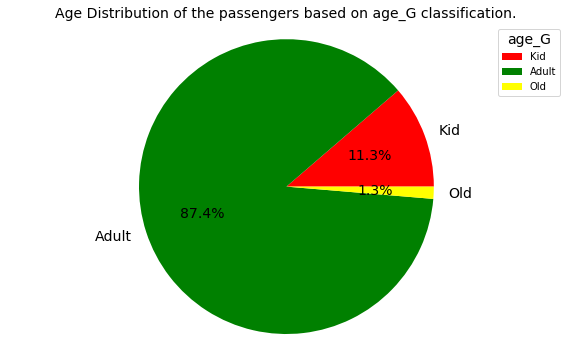

In [38]:
plt.rcParams['figure.figsize']=(10,6)
sizes=[(Titanic.age_G=='Kid').sum(), (Titanic.age_G=='Adult').sum(), (Titanic.age_G=='Old').sum()]
labels= ['Kid','Adult','Old']
plt.pie(sizes, labels=labels,  autopct='%0.1f%%', colors=Set1)
plt.title('Age Distribution of the passengers based on age_G classification.')
plt.legend(title="age_G", loc="best")
plt.axis('equal')
plt.show()

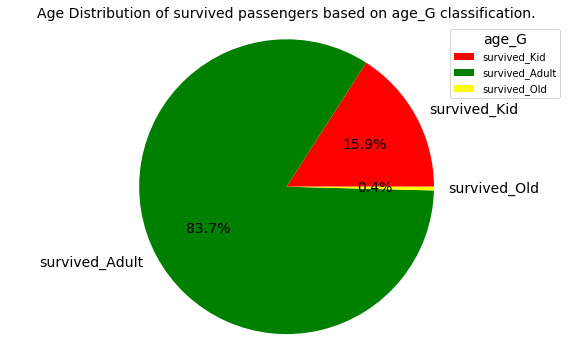

In [44]:
plt.rcParams['figure.figsize']=(10,6)
survives=[Titanic.age_G[(Titanic.survived==1) & (Titanic.age_G=='Kid')].count(),
          Titanic.age_G[(Titanic.survived==1) & (Titanic.age_G=='Adult')].count(),
          Titanic.age_G[(Titanic.survived==1) & (Titanic.age_G=='Old')].count()]
labels= ['survived_Kid','survived_Adult','survived_Old']

plt.pie(survives, labels=labels,  autopct='%0.1f%%', colors=Set1)
plt.title('Age Distribution of survived passengers based on age_G classification.')
plt.legend(title="age_G", loc="best")
plt.axis('equal')
plt.show()

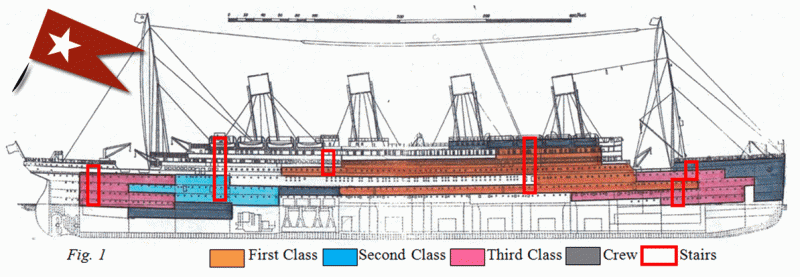

In [52]:
from IPython.display import Image
Image(filename="figure-one-side-view.gif")

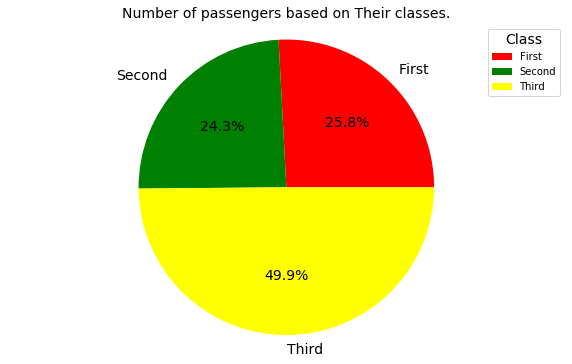

In [45]:
plt.rcParams['figure.figsize']=(10,6)
classes=[(Titanic['class']=='First').sum(),
          (Titanic['class']=='Second').sum(),
         (Titanic['class']=='Third').sum()]
labels= ['First','Second','Third']

plt.pie(classes, labels=labels,  autopct='%0.1f%%', colors=Set1)
plt.title('Number of passengers based on Their classes.')
plt.legend(title="Class", loc="best")
plt.axis('equal')
plt.show()

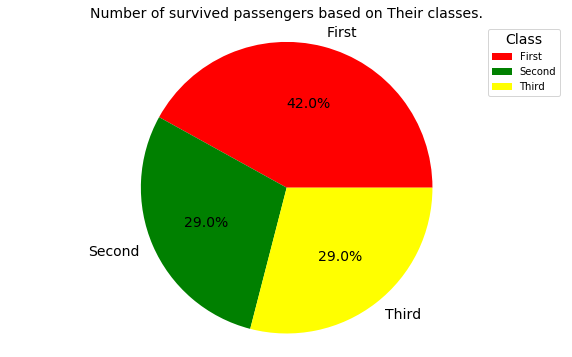

In [51]:
survived_classes=[Titanic['class'][(Titanic.survived==1) & (Titanic['class']=='First')].count(),
          Titanic['class'][(Titanic.survived==1) & (Titanic['class']=='Second')].count(),
          Titanic['class'][(Titanic.survived==1) & (Titanic['class']=='Second')].count()]

labels= ['First','Second','Third']

plt.pie(survived_classes, labels=labels,  autopct='%0.1f%%', colors=Set1)
plt.title('Number of survived passengers based on Their classes.')
plt.legend(title="Class", loc="best")
plt.axis('equal')
plt.show()